#### Importing packages

In [443]:
# importing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
from csv import QUOTE_ALL




#### Loading the datasets

In [444]:
import pandas as pd
from csv import QUOTE_ALL
# loading the trump data set
trumpdata = pd.read_csv(
    'US Election 2020 Tweets/hashtag_donaldtrump.csv',
    quoting=QUOTE_ALL,
    encoding='utf-8',
    on_bad_lines='skip',  # Skips problematic rows
    engine='python'  # Use the Python engine for more flexibility
)

# loading the rest of the datasets
bidendata = pd.read_csv('US Election 2020 Tweets/hashtag_joebiden.csv')
trainingdata = pd.read_csv('training data/twitter_sentiment_training_data.csv')

governors_county_candidate_data = pd.read_csv('US Election 2020 Tweets/governors_county_candidate.csv')
governors_county_data = pd.read_csv('US Election 2020 Tweets/governors_county.csv')
governors_state_data = pd.read_csv('US Election 2020 Tweets/governors_state.csv')
house_candidate_data = pd.read_csv('US Election 2020 Tweets/house_candidate.csv')
house_state_data = pd.read_csv('US Election 2020 Tweets/house_state.csv')
president_county_candidate_data = pd.read_csv('US Election 2020 Tweets/president_county_candidate.csv')
president_county_data = pd.read_csv('US Election 2020 Tweets/president_county.csv')
president_state_data = pd.read_csv('US Election 2020 Tweets/president_state.csv')
senate_county_candidate_data = pd.read_csv('US Election 2020 Tweets/senate_county_candidate.csv')
senate_county_data = pd.read_csv('US Election 2020 Tweets/senate_county.csv')
senate_state_data = pd.read_csv('US Election 2020 Tweets/senate_state.csv')



/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_59865/1858257467.py:13: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  bidendata = pd.read_csv('US Election 2020 Tweets/hashtag_joebiden.csv')


# Biden Tweet Data

#### Initial Look

One way to get a nice overview of the dataset is to look at the head() as well as info(). We have utilized these to get an intial look of the data.

In [445]:
print('Biden Tweets Data Info:\n')
bidendata.info()

Biden Tweets Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059909 entries, 0 to 1059908
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   created_at            1059909 non-null  object 
 1   tweet_id              887173 non-null   object 
 2   tweet                 887173 non-null   object 
 3   likes                 887092 non-null   object 
 4   retweet_count         887073 non-null   float64
 5   source                886360 non-null   object 
 6   user_id               887067 non-null   object 
 7   user_name             887048 non-null   object 
 8   user_screen_name      786660 non-null   object 
 9   user_description      704647 non-null   object 
 10  user_join_date        776784 non-null   object 
 11  user_followers_count  776885 non-null   object 
 12  user_location         543063 non-null   object 
 13  lat                   355284 non-null   object 
 14  long     

In [446]:
print('Biden Tweets Data Head:\n')
bidendata.head()

Biden Tweets Data Head:



created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

               source                user_id           user_name  \
0           TweetDeck            360666534.0  El Sol Latino News   
1    Twitter for iPad            809904438.0         Cheri A. 🇺🇸   
2     Twitter Web App           3494182277.0          Flag Waver   
3  Twitter for iPhone  8.242596012018524e+17       Michelle Ferg   
4     Twitter Web App  1.032806955356545e+18      the Gold State   

  user_screen_name                                   user_description  ...  \
0  elsollatinonews  🌐 Noticias de interés para latinos de la costa...  ...   
1     Biloximeemaw  Locked and loaded Meemaw. Love God, my family ...  ...   
2      Flag_Wavers                                                NaN  ...   
3    MichelleFerg4                                                NaN  ...   
4    theegoldstate  A Silicon Valley #independent #News #Media #St...  ...   

  user_followers_count                 user_location        lat        long  \
0               1860.0  Philadelphia, PA / Miami, FL   25.77427   -80.19366   
1               6628.0                           NaN        NaN         NaN   
2               1536.0         Golden Valley Arizona  46.304036 -109.171431   
3                 27.0                           NaN        NaN         NaN   
4                390.0               California, USA  36.701463 -118.755997   

  city                   country      continent       state state_code  \
0  NaN  United States of America  North America     Florida         FL   
1  NaN                       NaN            NaN         NaN        NaN   
2  NaN  United States of America  North America     Montana         MT   
3  NaN                       NaN            NaN         NaN        NaN   
4  NaN  United States of America  North America  California         CA   

                    collected_at  
0            2020-10-21 00:00:00  
1  2020-10-21 00:00:00.517827283  
2  2020-10-21 00:00:01.035654566  
3  2020-10-21 00:00:01.553481849  
4  2020-10-21 00:00:02.071309132  

[5 rows x 21 columns]

In [447]:
# Drop unnecessary columns
columns_to_drop = ['user_name', 'user_description', 'user_join_date', 'user_location', 'source', 'collected_at']
bidendata.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
print("Remaining columns:\n", bidendata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059909 entries, 0 to 1059908
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   created_at            1059909 non-null  object 
 1   tweet_id              887173 non-null   object 
 2   tweet                 887173 non-null   object 
 3   likes                 887092 non-null   object 
 4   retweet_count         887073 non-null   float64
 5   user_id               887067 non-null   object 
 6   user_screen_name      786660 non-null   object 
 7   user_followers_count  776885 non-null   object 
 8   lat                   355284 non-null   object 
 9   long                  355284 non-null   object 
 10  city                  186869 non-null   object 
 11  country               353770 non-null   object 
 12  continent             353788 non-null   object 
 13  state                 260191 non-null   object 
 14  state_code            244603 non-n

#### Total Rows and NaN Values

This not only gives us an overview of the amount of rows, but also the amount of missing NaN values. It is also essential look at the percentage of NaN values in the given column as this can help us determine whether we should drop the row or not.

In [448]:
# Total rows in the dataset
# Check the total number of rows in the dataset
total_rows = bidendata.shape[0]
print(f"Total number of rows: {total_rows}\n\n")


print("Total missing values:\n", bidendata.isna().sum().sum(), "\n\n")
print("Missing values in the different features:\n", bidendata.isna().sum())

# Calculate percentage of missing values for each column
missing_percentages = (bidendata.isna().sum() / total_rows) * 100

# Print columns with their missing percentages
print("Percentage of missing values per column:\n", missing_percentages)

Total number of rows: 1059909


Total missing values:
 6729814 


Missing values in the different features:
 created_at                   0
tweet_id                172736
tweet                   172736
likes                   172817
retweet_count           172836
user_id                 172842
user_screen_name        273249
user_followers_count    283024
lat                     704625
long                    704625
city                    873040
country                 706139
continent               706121
state                   799718
state_code              815306
dtype: int64
Percentage of missing values per column:
 created_at               0.000000
tweet_id                16.297248
tweet                   16.297248
likes                   16.304890
retweet_count           16.306683
user_id                 16.307249
user_screen_name        25.780421
user_followers_count    26.702670
lat                     66.479764
long                    66.479764
city                    82.3693

In [449]:
# List of all US states and Washington D.C.
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 
    'District of Columbia'
]

# Step 1: Filter rows where 'state' is a US state
bidendata = bidendata[bidendata['state'].isin(us_states)]

# Step 2: Drop rows with NaN values in 'state'
bidendata = bidendata.dropna(subset=['state'])

# Calculate the percentage of tweets for each state
state_percentages = bidendata['state'].value_counts(normalize=True) * 100


# Check the final dataset shape and missing values
print("\nFinal dataset shape:", bidendata.shape)
print("Missing values in the cleaned dataset:\n", bidendata.isna().sum())



Final dataset shape: (153095, 15)
Missing values in the cleaned dataset:
 created_at                  0
tweet_id                    0
tweet                       0
likes                       0
retweet_count               0
user_id                     0
user_screen_name            0
user_followers_count        0
lat                         0
long                        0
city                    62567
country                     0
continent                   0
state                       0
state_code                  0
dtype: int64


As seen above, some of the rows have very high percentages of missing values. We have decided to drop the columns with a too high percentage of missing rows, while filling in the missing values for the rest. Specifically for 'State' we have decided to keep it as it is essential to our analysis.

In [450]:
# Dropping high-missing-value columns
high_missing_cols = ['lat', 'long', 'city', 'country', 'continent', 'state_code']
bidendata.drop(columns=high_missing_cols, inplace=True)

# Drop rows with missing critical identifiers
bidendata.dropna(subset=['tweet_id', 'tweet', 'user_id', 'user_screen_name'], inplace=True)

# Fill missing values for critical columns such as the amount of likes and retweets
bidendata['likes'] = pd.to_numeric(bidendata['likes'], errors='coerce').fillna(0).astype(int)
bidendata['retweet_count'] = pd.to_numeric(bidendata['retweet_count'], errors='coerce').fillna(0).astype(int)

# Handle 'user_followers_count' by filling missing values with 0
bidendata['user_followers_count'] = pd.to_numeric(bidendata['user_followers_count'], errors='coerce').fillna(0).astype(int)

# Verifying the amount of NaN values
print("Total missing values:\n", bidendata.isna().sum().sum(), "\n\n")
print("Missing values in the different features:\n", bidendata.isna().sum())

# Final dataset shape
print(f"Cleaned dataset shape: {bidendata.shape}")
print(f"Total number of rows: {total_rows}\n\n")


Total missing values:
 0 


Missing values in the different features:
 created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
user_id                 0
user_screen_name        0
user_followers_count    0
state                   0
dtype: int64
Cleaned dataset shape: (153095, 9)
Total number of rows: 1059909




# Trump Tweets

### Again, doing the same thing for the Trump data

#### Initial Look

In [451]:
print('Trump Tweets Data Info:\n')
trumpdata.info()

Trump Tweets Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970911 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869661 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970917 non-null  object 
 12  user_location         675830 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  44570

In [452]:
print('\nTrump Tweets Data Head:\n')
trumpdata.head()


Trump Tweets Data Head:



created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:01  1.3165292227484303e+18   
2  2020-10-15 00:00:02   1.316529228091847e+18   
3  2020-10-15 00:00:02   1.316529227471237e+18   
4  2020-10-15 00:00:08  1.3165292523014513e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0            9.0   
2  #Trump: As a student I used to hear for years,...   2.0            1.0   
3  2 hours since last tweet from #Trump! Maybe he...   0.0            0.0   
4  You get a tie! And you get a tie! #Trump ‘s ra...   4.0            3.0   

               source               user_id              user_name  \
0           TweetDeck           360666534.0     El Sol Latino News   
1    Social Mediaset            331617619.0                Tgcom24   
2     Twitter Web App             8436472.0                 snarke   
3       Trumpytweeter  8.28355589206057e+17          Trumpytweeter   
4  Twitter for iPhone            47413798.0  Rana Abtar - رنا أبتر   

  user_screen_name                                   user_description  ...  \
0  elsollatinonews  🌐 Noticias de interés para latinos de la costa...  ...   
1  MediasetTgcom24  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2           snarke  Will mock for food! Freelance writer, blogger,...  ...   
3    trumpytweeter  If he doesn't tweet for some time, should we b...  ...   
4        Ranaabtar  Washington Correspondent, Lebanese-American ,c...  ...   

  user_followers_count                 user_location         lat  \
0               1860.0  Philadelphia, PA / Miami, FL    25.77427   
1            1067661.0                           NaN         NaN   
2               1185.0                      Portland  45.5202471   
3                 32.0                           NaN         NaN   
4               5393.0                 Washington DC  38.8949924   

           long        city                   country      continent  \
0     -80.19366         NaN  United States of America  North America   
1           NaN         NaN                       NaN            NaN   
2  -122.6741949    Portland  United States of America  North America   
3           NaN         NaN                       NaN            NaN   
4   -77.0365581  Washington  United States of America  North America   

                  state state_code                   collected_at  
0               Florida         FL            2020-10-21 00:00:00  
1                   NaN        NaN  2020-10-21 00:00:00.373216530  
2                Oregon         OR  2020-10-21 00:00:00.746433060  
3                   NaN        NaN  2020-10-21 00:00:01.119649591  
4  District of Columbia         DC  2020-10-21 00:00:01.492866121  

[5 rows x 21 columns]

#### Cleaning Trump Data

It is important that we have the same columns as the biden data when doing our data analysis

In [453]:
# Drop unnecessary columns (same as Biden data)
columns_to_drop = ['user_name', 'user_description', 'user_join_date', 'user_location', 'source', 'collected_at', 
                   'lat', 'long', 'city', 'country', 'continent', 'state_code']
trumpdata.drop(columns=columns_to_drop, inplace=True)

In [454]:
# List of all US states and Washington D.C.
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 
    'District of Columbia'
]

# Step 1: Filter rows where 'state' is a US state
trumpdata = trumpdata[trumpdata['state'].isin(us_states)]

# Step 2: Drop rows with NaN values in 'state'
trumpdata = trumpdata.dropna(subset=['state'])

# Calculate the percentage of tweets for each state
state_percentages = trumpdata['state'].value_counts(normalize=True) * 100

# Check the final dataset shape and missing values
print("\nFinal dataset shape:", trumpdata.shape)
print("Missing values in the cleaned dataset:\n", trumpdata.isna().sum())



Final dataset shape: (178378, 9)
Missing values in the cleaned dataset:
 created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
user_id                 0
user_screen_name        0
user_followers_count    0
state                   0
dtype: int64


In [455]:
# Verify the remaining columns
print("\nRemaining columns after dropping unnecessary ones:")
trumpdata.info()


Remaining columns after dropping unnecessary ones:
<class 'pandas.core.frame.DataFrame'>
Index: 178378 entries, 0 to 971073
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            178378 non-null  object 
 1   tweet_id              178378 non-null  object 
 2   tweet                 178378 non-null  object 
 3   likes                 178378 non-null  object 
 4   retweet_count         178378 non-null  float64
 5   user_id               178378 non-null  object 
 6   user_screen_name      178378 non-null  object 
 7   user_followers_count  178378 non-null  object 
 8   state                 178378 non-null  object 
dtypes: float64(1), object(8)
memory usage: 13.6+ MB


In [456]:
# Total rows in the dataset
total_rows = trumpdata.shape[0]
print(f"\nTotal number of rows: {total_rows}\n")

# Total missing values in the dataset
print("Total missing values:\n", trumpdata.isna().sum().sum(), "\n")

# Missing values in each column
print("Missing values in the different features:\n", trumpdata.isna().sum())

# Calculate percentage of missing values for each column
missing_percentages = (trumpdata.isna().sum() / total_rows) * 100

# Print columns with their missing percentages
print("\nPercentage of missing values per column:\n", missing_percentages)


Total number of rows: 178378

Total missing values:
 0 

Missing values in the different features:
 created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
user_id                 0
user_screen_name        0
user_followers_count    0
state                   0
dtype: int64

Percentage of missing values per column:
 created_at              0.0
tweet_id                0.0
tweet                   0.0
likes                   0.0
retweet_count           0.0
user_id                 0.0
user_screen_name        0.0
user_followers_count    0.0
state                   0.0
dtype: float64


In [457]:
bidendata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 153095 entries, 0 to 1059895
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   created_at            153095 non-null  object
 1   tweet_id              153095 non-null  object
 2   tweet                 153095 non-null  object
 3   likes                 153095 non-null  int64 
 4   retweet_count         153095 non-null  int64 
 5   user_id               153095 non-null  object
 6   user_screen_name      153095 non-null  object
 7   user_followers_count  153095 non-null  int64 
 8   state                 153095 non-null  object
dtypes: int64(3), object(6)
memory usage: 11.7+ MB


#### Data Visualization

In [458]:
bidendata['likes'] = pd.to_numeric(bidendata['likes'], errors='coerce')
trumpdata['likes'] = pd.to_numeric(trumpdata['likes'], errors='coerce')

# Get top 10 most liked tweets for Biden dataset
top_liked_biden = bidendata.nlargest(10, 'likes')[['tweet', 'likes']]

# Get top 10 most liked tweets for Trump dataset
top_liked_trump = trumpdata.nlargest(10, 'likes')[['tweet', 'likes']]

# Display the results
print("Top 10 Most Liked Tweets - Biden Hashtag:")
print(top_liked_biden)

print("\nTop 10 Most Liked Tweets - Trump Hashtag:")
print(top_liked_trump)

Top 10 Most Liked Tweets - Biden Hashtag:
                                                    tweet   likes
20435   Tonight a woman in the audience of Trump's tow...  165702
611955  America Assembled!🇺🇸🎉\n\n@JoeBiden @KamalaHarr...   74528
196718  Are you there, God? It's me, Bette. I'm so sca...   59403
996551  Wonderful speeches tonight by President and Vi...   59345
281655  Are you there, God? It's me again, Bette. We'r...   45540
16737   OMG!  #JoeBiden speaks like a human being!  An...   43399
145822  Whatever you do, DON’T BELIEVE THE POLLS.  Vot...   22654
398265  The big fight TODAY!!!!! @realDonaldTrump vs #...   22641
648234                #Biden wins https://t.co/MUi0oXgs73   22004
538920  My best vote-counter source in #PA now predict...   20967

Top 10 Most Liked Tweets - Trump Hashtag:
                                                    tweet    likes
786671  America Assembled!🇺🇸🎉\n\n@JoeBiden @KamalaHarr...  74084.0
245120  The White House still has not released a healt.

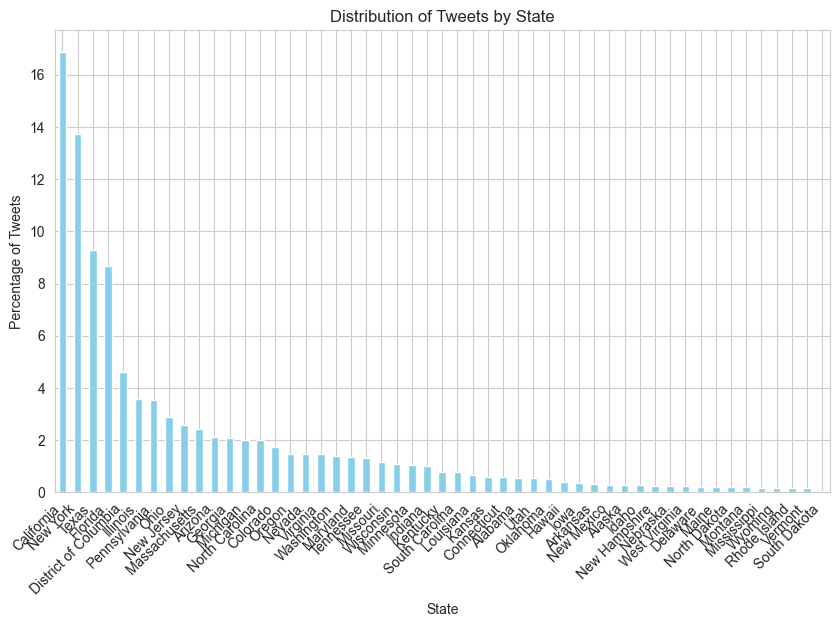

In [459]:
import matplotlib.pyplot as plt

# Calculate the distribution of tweets by state
state_distribution = bidendata['state'].value_counts(normalize=True) * 100

# Bar chart
plt.figure(figsize=(10, 6))
state_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Tweets by State')
plt.xlabel('State')
plt.ylabel('Percentage of Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()


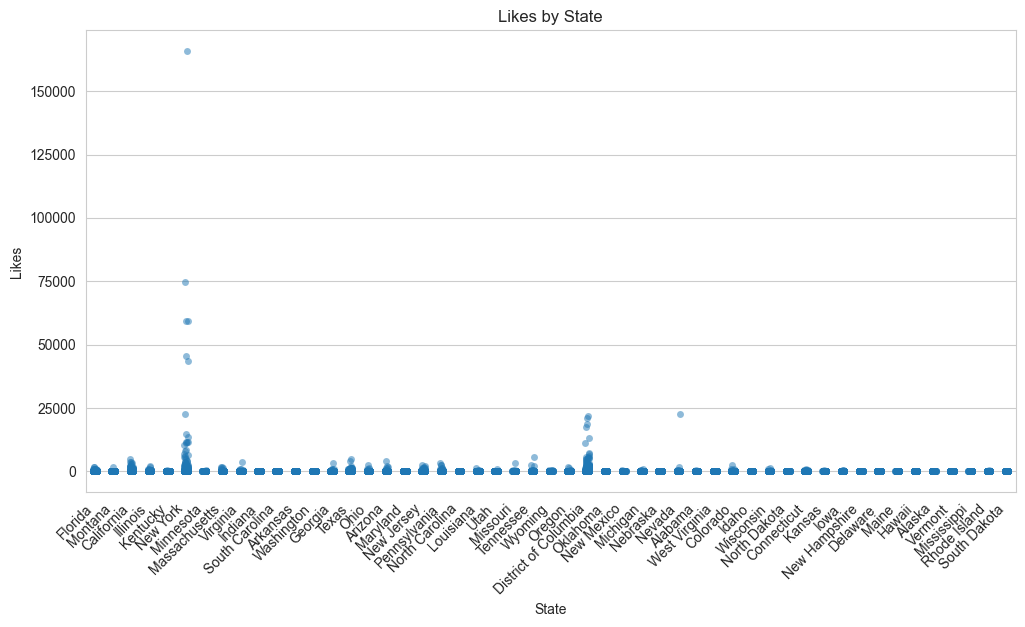

In [460]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.stripplot(x='state', y='likes', data=bidendata, jitter=True, alpha=0.5)
plt.title('Likes by State')
plt.xlabel('State')
plt.ylabel('Likes')
plt.xticks(rotation=45, ha='right')
plt.show()


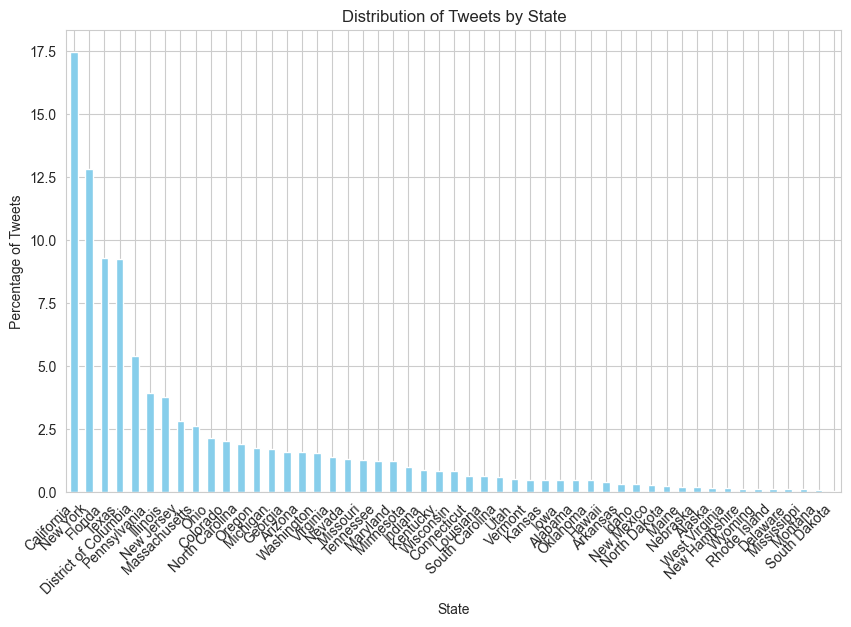

In [461]:
import matplotlib.pyplot as plt

# Calculate the distribution of tweets by state
state_distribution = trumpdata['state'].value_counts(normalize=True) * 100

# Bar chart
plt.figure(figsize=(10, 6))
state_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Tweets by State')
plt.xlabel('State')
plt.ylabel('Percentage of Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()


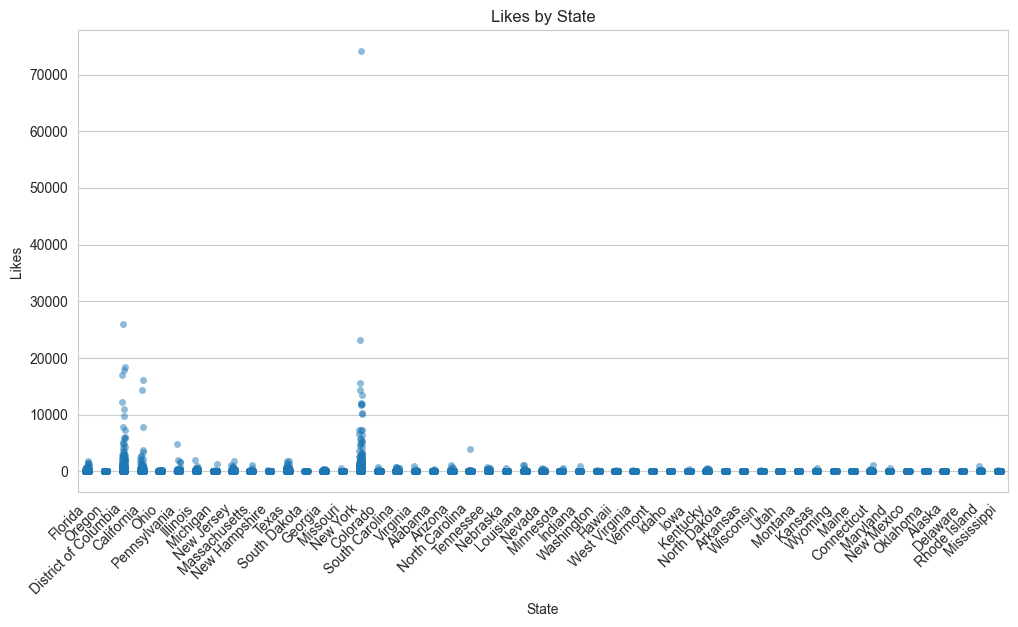

In [462]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.stripplot(x='state', y='likes', data=trumpdata, jitter=True, alpha=0.5)
plt.title('Likes by State')
plt.xlabel('State')
plt.ylabel('Likes')
plt.xticks(rotation=45, ha='right')
plt.show()


As seen above, the data for 'State' is quite similar for the two datasets.

In [463]:
# Cleaning

# remove missing values
trainingdata = trainingdata.dropna()

# change sentiment to 0, 1, 2
trainingdata['category'] = trainingdata['category'].replace(1, 2)
trainingdata['category'] = trainingdata['category'].replace(0, 1)
trainingdata['category'] = trainingdata['category'].replace(-1, 0)

## remvoing non-string rows
bidendata = bidendata[bidendata['tweet'].apply(lambda x: isinstance(x, str))]
trumpdata = trumpdata[trumpdata['tweet'].apply(lambda x: isinstance(x, str))]
trainingdata = trainingdata[trainingdata['clean_text'].apply(lambda x: isinstance(x, str))]

In [464]:
# training data categories should have the same amount of tweets
def sample_min_group_size(group):
    return group.sample(trainingdata['category'].value_counts().min()).reset_index(drop=True)

trainingdata = trainingdata.groupby('category').apply(sample_min_group_size)

/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_59865/1185353498.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trainingdata = trainingdata.groupby('category').apply(sample_min_group_size)


In [465]:
# how many are left
print('Biden:', len(bidendata))
print('Trump:', len(trumpdata))

Biden: 153095
Trump: 178378


In [466]:
# preprocessing the training data
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

bidendata['tweet'] = bidendata['tweet'].apply(preprocess)
trumpdata['tweet'] = trumpdata['tweet'].apply(preprocess)
trainingdata['clean_text'] = trainingdata['clean_text'].apply(preprocess)

# Training the clasifier

In [467]:
# Parameters
max_words = 10000 
max_len = 100   

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(trainingdata['clean_text'])

# Tokenize and pad sequences
sequences = tokenizer.texts_to_sequences(trainingdata['clean_text'])
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# One-hot encode labels for multi-class classification
y = to_categorical(trainingdata['category'], num_classes=3)  # 3 classes (-1, 0, 1)


In [468]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (85221, 100), y_train shape: (85221, 3)
X_test shape: (21306, 100), y_test shape: (21306, 3)


In [469]:
# Define the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(3, activation='softmax')  # Output layer for 3 classes (0, 1, 2)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



/opt/anaconda3/envs/data-mining-course/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [470]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=16
)

Epoch 1/3
4261/4261 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.6858 - loss: 0.6923 - val_accuracy: 0.9163 - val_loss: 0.2650
Epoch 2/3
4261/4261 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9374 - loss: 0.2015 - val_accuracy: 0.9219 - val_loss: 0.2609
Epoch 3/3
4261/4261 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9652 - loss: 0.1095 - val_accuracy: 0.9123 - val_loss: 0.3026


In [471]:
# the 6 categories
positive_trump = []
negative_trump = []
neutral_trump = []

positive_biden = []
negative_biden = []
neutral_biden = []

In [472]:
# processing the biden and trump text
def preprocess_tweets(texts, max_len=100):
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    # Pad sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences



preprocessed_tweets_trump = preprocess_tweets(trumpdata['tweet'])
preprocessed_tweets_biden = preprocess_tweets(bidendata['tweet'])

In [473]:
# Predict probabilities
trump_predictions = model.predict(preprocessed_tweets_trump)
biden_predictions = model.predict(preprocessed_tweets_biden)

# Convert probabilities to class labels
predicted_classes_trump = trump_predictions.argmax(axis=-1)
predicted_classes_biden = biden_predictions.argmax(axis=-1)

# Map numeric classes to sentiment labels
class_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
predicted_labels_trump = [class_mapping[label] for label in predicted_classes_trump]
predicted_labels_biden = [class_mapping[label] for label in predicted_classes_biden]

# Print the results
# trump tweets
for i, label in enumerate(predicted_labels_trump):
    row = trumpdata.iloc[i].to_dict()
    if label == 'Positive':
        positive_trump.append(row)
    elif label == 'Negative':
        negative_trump.append(row)
    elif label == 'Neutral':
        neutral_trump.append(row)

# biden tweets
for i, label in enumerate(predicted_labels_biden):
    row = bidendata.iloc[i].to_dict()
    if label == 'Positive':
        positive_biden.append(row)
    elif label == 'Negative':
        negative_biden.append(row)
    elif label == 'Neutral':
        neutral_biden.append(row)

5575/5575 ━━━━━━━━━━━━━━━━━━━━ 5s 875us/step
4785/4785 ━━━━━━━━━━━━━━━━━━━━ 4s 751us/step


Trump
Positive: 29.836639047416163 %
Negative: 27.687270851786653 %
Neutral: 42.47609010079718 %
Biden
Positive: 33.99588490806362 %
Negative: 19.434991345243148 %
Neutral: 46.56912374669323 %


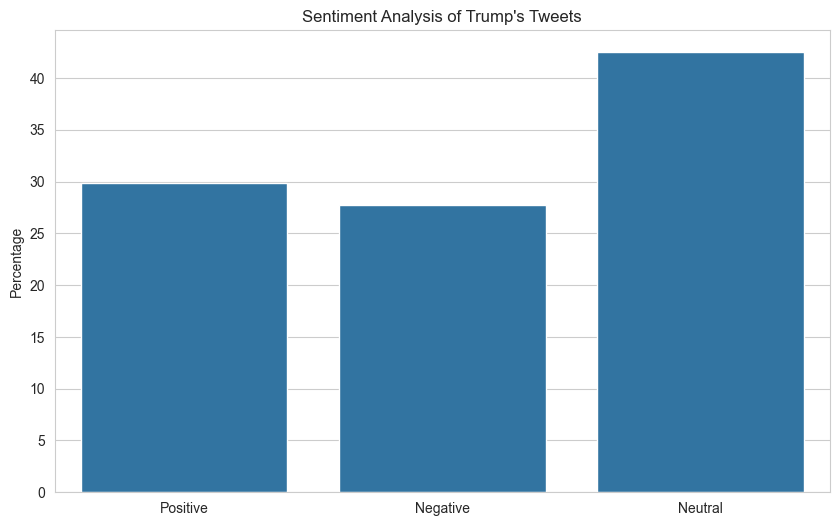

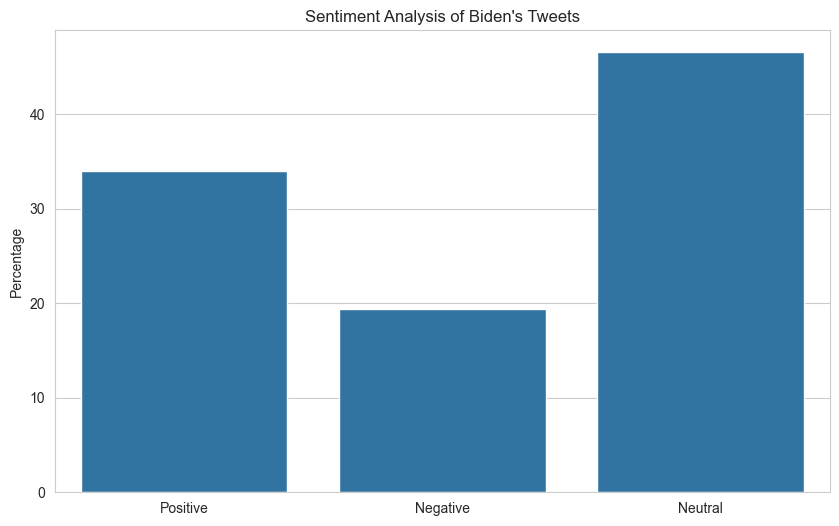

In [474]:
# demo show the results in percentage
count_positive_trump = len(positive_trump) / len(trumpdata) * 100
count_negative_trump = len(negative_trump) / len(trumpdata) * 100
count_neutral_trump = len(neutral_trump) / len(trumpdata) * 100

count_positive_biden = len(positive_biden) / len(bidendata) * 100
count_negative_biden = len(negative_biden) / len(bidendata) * 100
count_neutral_biden = len(neutral_biden) / len(bidendata) * 100

print('Trump')
print('Positive:', count_positive_trump, '%')
print('Negative:', count_negative_trump, '%')
print('Neutral:', count_neutral_trump, '%')

print('Biden')
print('Positive:', count_positive_biden, '%')
print('Negative:', count_negative_biden, '%')
print('Neutral:', count_neutral_biden, '%')

# Plot the results using 
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[count_positive_trump, count_negative_trump, count_neutral_trump])
plt.title("Sentiment Analysis of Trump's Tweets")
plt.ylabel("Percentage")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[count_positive_biden, count_negative_biden, count_neutral_biden])
plt.title("Sentiment Analysis of Biden's Tweets")
plt.ylabel("Percentage")
plt.show()


In [475]:
# demo: show negative biden tweets
for tweet_data in negative_biden:
    if isinstance(tweet_data, dict):
        print(tweet_data['tweet'])
        print('state:', tweet_data['state'])
        print('---')

in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump

but ccp from china or porn on twitter 

that’s always been fine for jack vijaya dickc katies

marciadorsey is jack sick
state: Illinois
---
fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden httpstcopdnmb0nqru
state: Kentucky
---
comments on this do democrats understand how ruthless china is httpstcoqevk00yhs3 china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade httpstcowjm1hytfnz
state: Florida
---
twitter is doing everything they can to help democrats win the election making sure nobody sees a negative story about biden only negative stories on trump twittercensorship biden ukraine hunterbiden httpstcodblkqbmvru
state: California
---
come on abc please do the right thing move the biden town hall  i bet a requirement for orange monkey to do the nbc to

#### Random Forest Classifier

In [476]:
# Step 1: Add a column for candidate
trumpdata['tweet_hashtag'] = 'Trump'
bidendata['tweet_hashtag'] = 'Biden'

In [477]:
# Step 2: Combine the datasets
combined_data = pd.concat([trumpdata, bidendata], ignore_index=True)

combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331473 entries, 0 to 331472
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            331473 non-null  object 
 1   tweet_id              331473 non-null  object 
 2   tweet                 331473 non-null  object 
 3   likes                 331473 non-null  float64
 4   retweet_count         331473 non-null  float64
 5   user_id               331473 non-null  object 
 6   user_screen_name      331473 non-null  object 
 7   user_followers_count  331473 non-null  object 
 8   state                 331473 non-null  object 
 9   tweet_hashtag         331473 non-null  object 
dtypes: float64(2), object(8)
memory usage: 25.3+ MB


In [478]:
# Step 1: Align sentiment predictions with combined_data
trump_predictions_aligned = predicted_labels_trump[:len(trumpdata)]
biden_predictions_aligned = predicted_labels_biden[:len(bidendata)]

# Combine the predictions
aligned_predictions = []
for idx, row in combined_data.iterrows():
    if row['tweet_hashtag'] == 'Trump':
        aligned_predictions.append(trump_predictions_aligned[idx])
    elif row['tweet_hashtag'] == 'Biden':
        aligned_predictions.append(biden_predictions_aligned[idx - len(trumpdata)])  # Adjust index for Biden

# Step 2: Add sentiment column
combined_data['sentiment'] = aligned_predictions

# Step 3: Map sentiment and hashtag to numeric scores (include Neutral)
sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
hashtag_mapping = {"Trump": 0, "Biden": 1}

combined_data['sentiment_score'] = combined_data['sentiment'].map(sentiment_mapping)
combined_data['hashtag_score'] = combined_data['tweet_hashtag'].map(hashtag_mapping)

# Step 4: Print a summary to confirm inclusion of neutral tweets
print(combined_data[['sentiment', 'sentiment_score', 'tweet_hashtag', 'hashtag_score']].head())
print("Remaining tweets:", combined_data.shape[0])

# Step 5: Check distribution of sentiment
print("Sentiment Distribution:")
print(combined_data['sentiment'].value_counts())


  sentiment  sentiment_score tweet_hashtag  hashtag_score
0   Neutral                1         Trump              0
1  Positive                2         Trump              0
2   Neutral                1         Trump              0
3  Negative                0         Trump              0
4  Positive                2         Trump              0
Remaining tweets: 331473
Sentiment Distribution:
sentiment
Neutral     147063
Positive    105268
Negative     79142
Name: count, dtype: int64


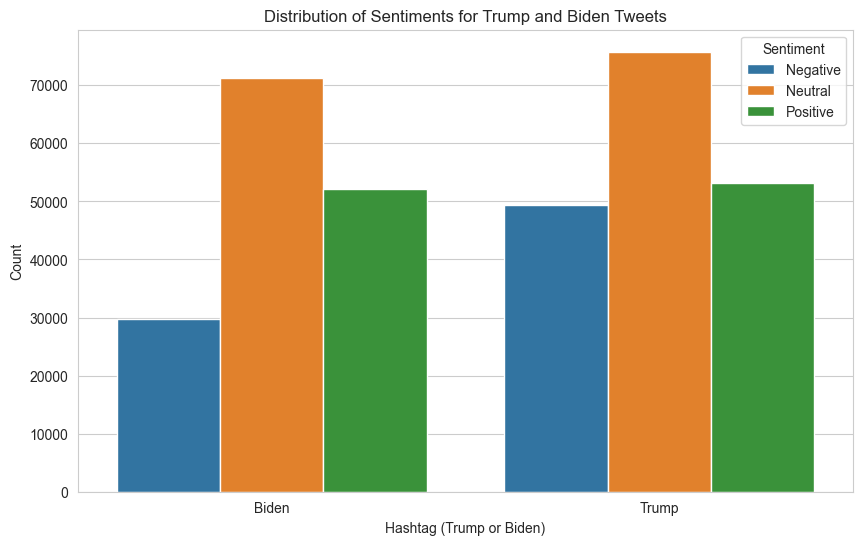

In [479]:
# Group by tweet_hashtag and sentiment to count occurrences
grouped_counts = combined_data.groupby(['tweet_hashtag', 'sentiment']).size().reset_index(name='count')

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts, x='tweet_hashtag', y='count', hue='sentiment')
plt.title('Distribution of Sentiments for Trump and Biden Tweets')
plt.xlabel('Hashtag (Trump or Biden)')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [480]:
# Map states to their 2020 election results (1 for Biden, 0 for Trump)
election_2020_results = {
    'Alabama': 0, 'Alaska': 0, 'Arizona': 1, 'Arkansas': 0, 'California': 1, 
    'Colorado': 1, 'Connecticut': 1, 'Delaware': 1, 'Florida': 0, 'Georgia': 1, 
    'Hawaii': 1, 'Idaho': 0, 'Illinois': 1, 'Indiana': 0, 'Iowa': 0, 
    'Kansas': 0, 'Kentucky': 0, 'Louisiana': 0, 'Maine': 1, 'Maryland': 1, 
    'Massachusetts': 1, 'Michigan': 1, 'Minnesota': 1, 'Mississippi': 0, 
    'Missouri': 0, 'Montana': 0, 'Nebraska': 0, 'Nevada': 1, 'New Hampshire': 1, 
    'New Jersey': 1, 'New Mexico': 1, 'New York': 1, 'North Carolina': 0, 
    'North Dakota': 0, 'Ohio': 0, 'Oklahoma': 0, 'Oregon': 1, 'Pennsylvania': 1, 
    'Rhode Island': 1, 'South Carolina': 0, 'South Dakota': 0, 'Tennessee': 0, 
    'Texas': 0, 'Utah': 0, 'Vermont': 1, 'Virginia': 1, 'Washington': 1, 
    'West Virginia': 0, 'Wisconsin': 1, 'Wyoming': 0, 'District of Columbia': 1
}

# Add the state_vote column
combined_data['state_vote'] = combined_data['state'].map(election_2020_results)

# Check if any rows have a missing state_vote value
missing_state_vote = combined_data['state_vote'].isnull().sum()
print(f"Missing state_vote rows: {missing_state_vote}")

# Filter rows with valid state_vote values
combined_data = combined_data[combined_data['state_vote'].notnull()].reset_index(drop=True)


Missing state_vote rows: 0


/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_59865/2971208290.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['likes'] = pd.to_numeric(X['likes'], errors='coerce')
/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_59865/2971208290.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['retweet_count'] = pd.to_numeric(X['retweet_count'], errors='coerce')


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.50      0.59     21764
           1       0.79      0.91      0.84     44531

    accuracy                           0.77     66295
   macro avg       0.76      0.70      0.72     66295
weighted avg       0.77      0.77      0.76     66295



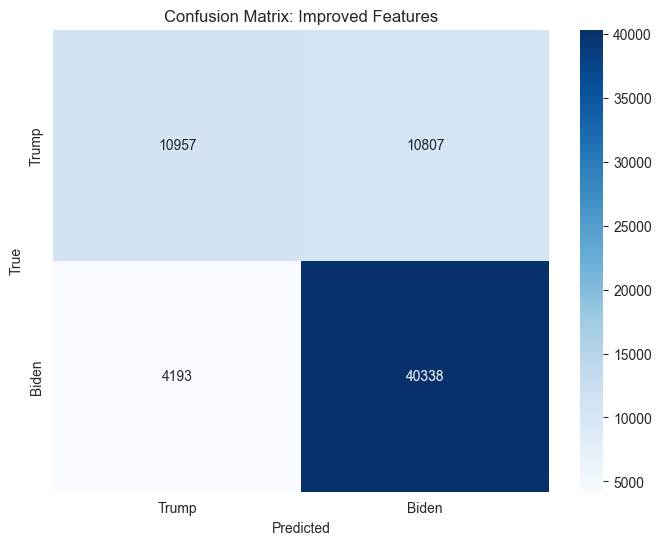

In [481]:
import numpy as np

# Ensure user_followers_count is numeric
combined_data['user_followers_count'] = pd.to_numeric(combined_data['user_followers_count'], errors='coerce')

# Fill missing or invalid values with 0
combined_data['user_followers_count'] = combined_data['user_followers_count'].fillna(0)

# Log-transform follower count to reduce skew
combined_data['log_followers'] = np.log1p(combined_data['user_followers_count'])

# Create interaction terms
combined_data['sentiment_likes_interaction'] = combined_data['sentiment_score'] * combined_data['likes']
combined_data['retweet_followers_interaction'] = combined_data['retweet_count'] * combined_data['log_followers']

# Add tweet frequency per user
tweet_frequency = combined_data['user_id'].value_counts()
combined_data['tweet_frequency'] = combined_data['user_id'].map(tweet_frequency)

# Update feature set
X = combined_data[['sentiment_score', 'hashtag_score', 'likes', 'retweet_count', 'log_followers',
                   'sentiment_likes_interaction', 'retweet_followers_interaction', 'tweet_frequency']]
y = combined_data['state_vote']

# Ensure numeric types for other columns
X['likes'] = pd.to_numeric(X['likes'], errors='coerce')
X['retweet_count'] = pd.to_numeric(X['retweet_count'], errors='coerce')

# Fill missing values with 0
X = X.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=10, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Trump', 'Biden'], yticklabels=['Trump', 'Biden'])
plt.title("Confusion Matrix: Improved Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63     21764
           1       0.82      0.80      0.81     44531

    accuracy                           0.75     66295
   macro avg       0.72      0.72      0.72     66295
weighted avg       0.75      0.75      0.75     66295



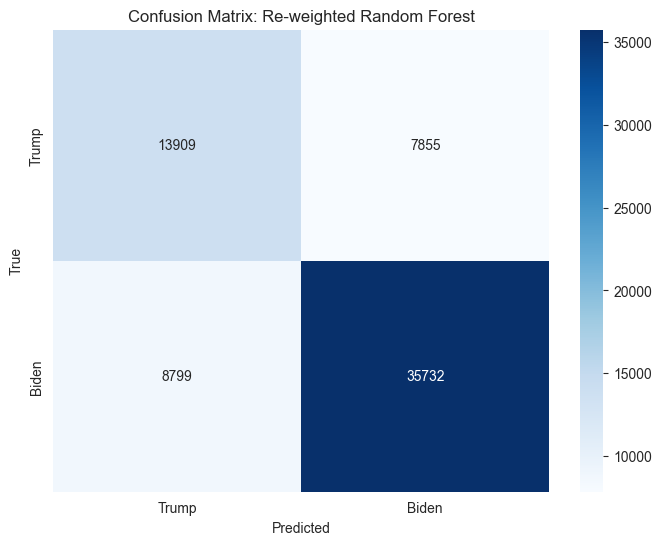

In [482]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with class_weight='balanced'
clf = RandomForestClassifier(
    n_estimators=500, 
    max_depth=None, 
    min_samples_split=10, 
    min_samples_leaf=1, 
    class_weight='balanced', 
    random_state=42
)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Trump', 'Biden'], yticklabels=['Trump', 'Biden'])
plt.title("Confusion Matrix: Re-weighted Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [486]:
print("Columns in X:", X.columns)

print("Columns in combined_data:", combined_data.columns)

if 'user_followers_count' not in combined_data.columns:
    print("Missing 'user_followers_count'. Ensure it is part of the data preprocessing steps.")

# Define feature matrix X and target y
X = combined_data[['sentiment_score', 'hashtag_score', 'likes', 'retweet_count',
                   'user_followers_count', 'log_followers',
                   'sentiment_likes_interaction', 'retweet_followers_interaction', 
                   'tweet_frequency']]
y = combined_data['state_vote']

# Ensure numeric types and fill missing values
X['user_followers_count'] = pd.to_numeric(X['user_followers_count'], errors='coerce')
X = X.fillna(0)



Columns in X: Index(['sentiment_score', 'hashtag_score', 'likes', 'retweet_count',
       'log_followers', 'sentiment_likes_interaction',
       'retweet_followers_interaction', 'tweet_frequency'],
      dtype='object')
Columns in combined_data: Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'user_id',
       'user_screen_name', 'user_followers_count', 'state', 'tweet_hashtag',
       'sentiment', 'sentiment_score', 'hashtag_score', 'state_vote',
       'log_followers', 'sentiment_likes_interaction',
       'retweet_followers_interaction', 'tweet_frequency'],
      dtype='object')


/var/folders/x9/7trw1hcj47vbr9_c1w7dqnvw0000gn/T/ipykernel_59865/3734014232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['user_followers_count'] = pd.to_numeric(X['user_followers_count'], errors='coerce')


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.38      0.54     21764
           1       0.77      0.99      0.86     44531

    accuracy                           0.79     66295
   macro avg       0.86      0.69      0.70     66295
weighted avg       0.83      0.79      0.76     66295



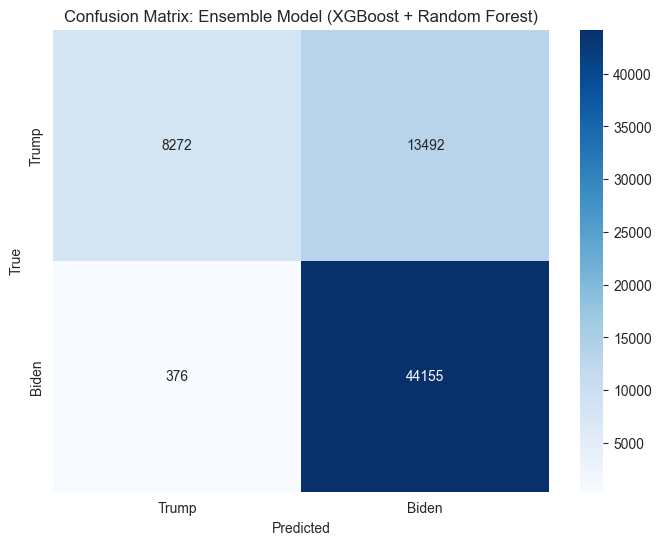

In [488]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the individual models
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=2.5,
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Step 2: Combine the models in a VotingClassifier (hard or soft voting)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'  # 'soft' for probabilities; 'hard' for majority voting
)

# Step 3: Train-test split (if not already done)
# Assuming X_train, X_test, y_train, y_test already exist
# If not, split the data:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# Step 4: Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = ensemble_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Trump', 'Biden'], yticklabels=['Trump', 'Biden'])
plt.title("Confusion Matrix: Ensemble Model (XGBoost + Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73     21764
           1       0.73      0.70      0.72     21764

    accuracy                           0.72     43528
   macro avg       0.72      0.72      0.72     43528
weighted avg       0.72      0.72      0.72     43528



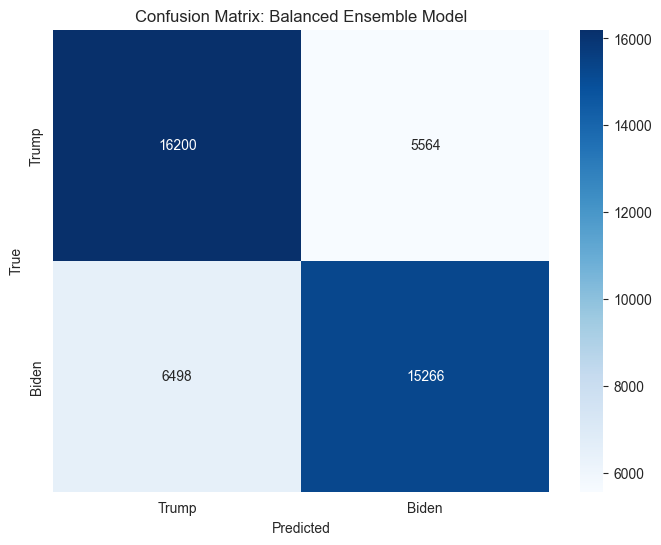

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Separate majority and minority classes
biden_data = combined_data[combined_data['state_vote'] == 1]
trump_data = combined_data[combined_data['state_vote'] == 0]

# Step 2: Undersample the majority class (Biden in this case)
biden_data_downsampled = resample(
    biden_data,
    replace=False,  # Don't duplicate data
    n_samples=len(trump_data),  # Match the number of Trump tweets
    random_state=42
)

# Step 3: Combine the balanced datasets
balanced_data = pd.concat([biden_data_downsampled, trump_data])

# Step 4: Prepare feature matrix and target vector
X = balanced_data[['sentiment_score', 'hashtag_score', 'likes', 'retweet_count', 
                   'log_followers', 'sentiment_likes_interaction', 
                   'retweet_followers_interaction', 'tweet_frequency']]
y = balanced_data['state_vote']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Define individual models
xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Step 7: Create ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'  # 'soft' for probabilities; 'hard' for majority voting
)

# Step 8: Fit the model
ensemble_model.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred = ensemble_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Trump', 'Biden'], yticklabels=['Trump', 'Biden'])
plt.title("Confusion Matrix: Balanced Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
